In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")


## EDA

In [ ]:
#clean dataset of 253,680 survey responses to the CDC - 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
print(data)

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        

EDA

In [ ]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
print(data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
#transform data to integer
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
#checking unique values
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
#function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [ ]:
v_counts(data)

0    213703
2     35346
1      4631
Name: Diabetes_012, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
___________________________________

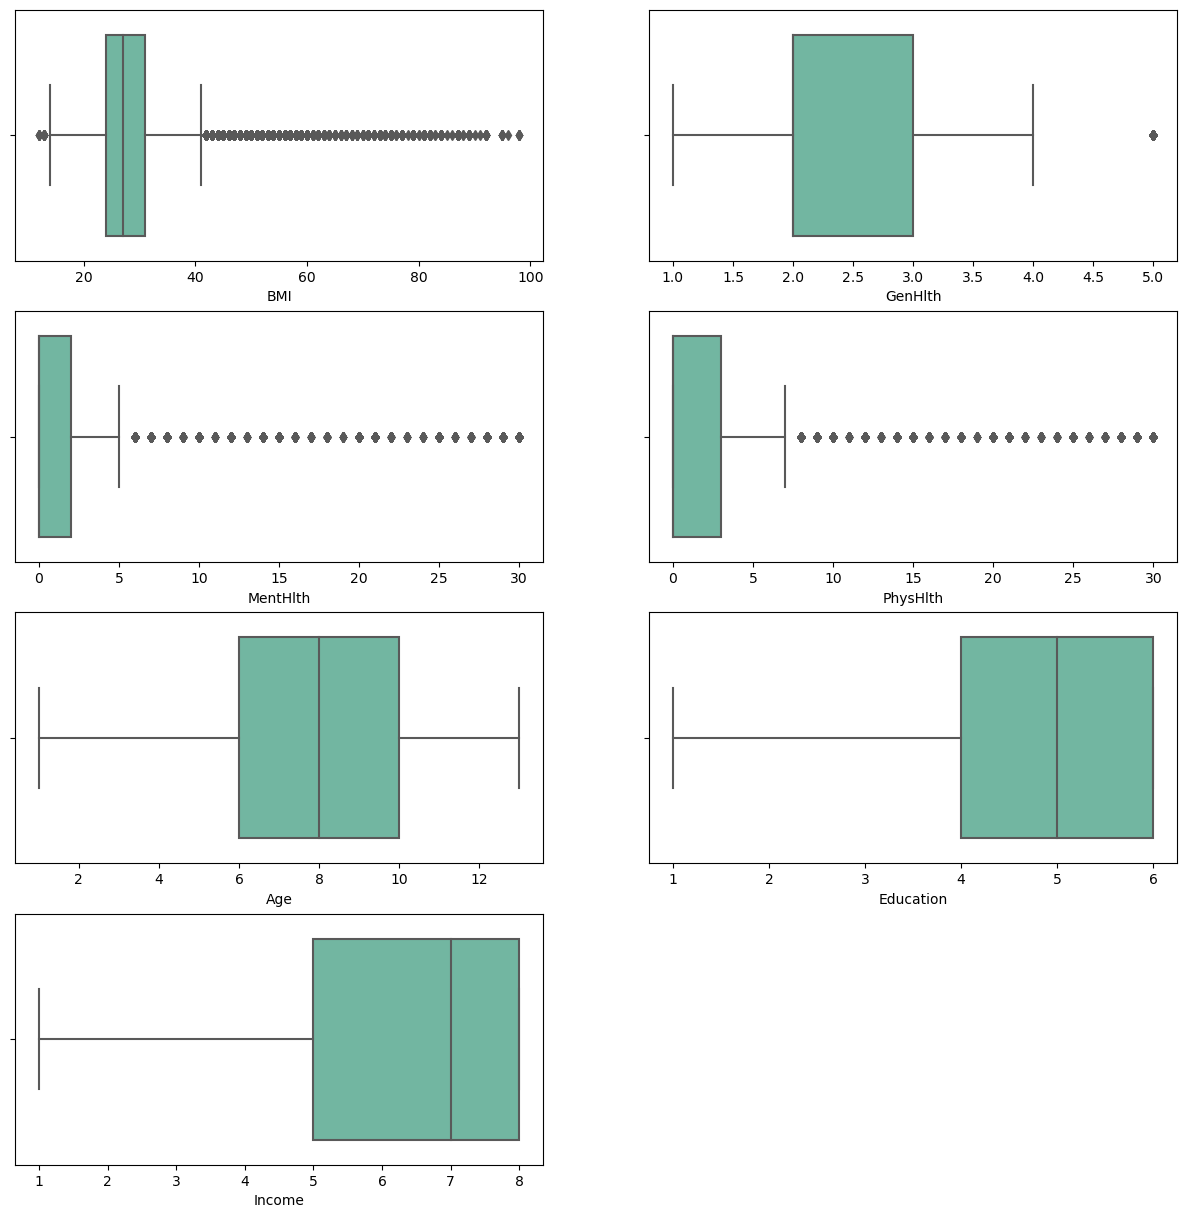

In [ ]:
#check outliners
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

In [ ]:
#check and drop duplicated data
data.duplicated().sum()

23899

In [ ]:
#dropping duplicated data
data.drop_duplicates(inplace = True)
data.duplicated().sum()
data.shape

(229781, 22)

In [ ]:
##Replacing 0 into Non-Diabetic and 1 into Prediabetic and 2 for Diabetic
#adding new column Diabetes_binary_str
data["Diabetes_012_str"]= data["Diabetes_012"].replace({0:"NonDiabetic",1:"Prediabetic",2:"Diabetic"})

In [ ]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012_str
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,NonDiabetic
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,NonDiabetic
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,NonDiabetic
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,NonDiabetic
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,NonDiabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,NonDiabetic
253676,2,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,Diabetic
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,NonDiabetic
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,NonDiabetic


In [ ]:
#create a copy of data, called data 2 to start EDA
data2 = data.copy()

In [ ]:
# That help us to show the relation between features clearly

data2.Age[data2['Age'] == 1] = '18 to 24'
data2.Age[data2['Age'] == 2] = '25 to 29'
data2.Age[data2['Age'] == 3] = '30 to 34'
data2.Age[data2['Age'] == 4] = '35 to 39'
data2.Age[data2['Age'] == 5] = '40 to 44'
data2.Age[data2['Age'] == 6] = '45 to 49'
data2.Age[data2['Age'] == 7] = '50 to 54'
data2.Age[data2['Age'] == 8] = '55 to 59'
data2.Age[data2['Age'] == 9] = '60 to 64'
data2.Age[data2['Age'] == 10] = '65 to 69'
data2.Age[data2['Age'] == 11] = '70 to 74'
data2.Age[data2['Age'] == 12] = '75 to 79'
data2.Age[data2['Age'] == 13] = '80 or older'

#0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.
data2.Diabetes_012[data2['Diabetes_012'] == 0] = 'NonDiabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 1] = 'Prediabetes'
data2.Diabetes_012[data2['Diabetes_012'] == 2] = 'Diabetes'

data2.HighBP[data2['HighBP'] == 0] = 'No High'
data2.HighBP[data2['HighBP'] == 1] = 'High BP'

data2.HighChol[data2['HighChol'] == 0] = 'No High Cholesterol'
data2.HighChol[data2['HighChol'] == 1] = 'High Cholesterol'

data2.CholCheck[data2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
data2.CholCheck[data2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

data2.Smoker[data2['Smoker'] == 0] = 'No'
data2.Smoker[data2['Smoker'] == 1] = 'Yes'

data2.Stroke[data2['Stroke'] == 0] = 'No'
data2.Stroke[data2['Stroke'] == 1] = 'Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 0] = 'No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack'] == 1] = 'Yes'

data2.PhysActivity[data2['PhysActivity'] == 0] = 'No'
data2.PhysActivity[data2['PhysActivity'] == 1] = 'Yes'

data2.Fruits[data2['Fruits'] == 0] = 'No'
data2.Fruits[data2['Fruits'] == 1] = 'Yes'

data2.Veggies[data2['Veggies'] == 0] = 'No'
data2.Veggies[data2['Veggies'] == 1] = 'Yes'

data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 0] = 'No'
data2.HvyAlcoholConsump[data2['HvyAlcoholConsump'] == 1] = 'Yes'

data2.AnyHealthcare[data2['AnyHealthcare'] == 0] = 'No'
data2.AnyHealthcare[data2['AnyHealthcare'] == 1] = 'Yes'

data2.NoDocbcCost[data2['NoDocbcCost'] == 0] = 'No'
data2.NoDocbcCost[data2['NoDocbcCost'] == 1] = 'Yes'

data2.GenHlth[data2['GenHlth'] == 5] = 'Excellent'
data2.GenHlth[data2['GenHlth'] == 4] = 'Very Good'
data2.GenHlth[data2['GenHlth'] == 3] = 'Good'
data2.GenHlth[data2['GenHlth'] == 2] = 'Fair'
data2.GenHlth[data2['GenHlth'] == 1] = 'Poor'

data2.DiffWalk[data2['DiffWalk'] == 0] = 'No'
data2.DiffWalk[data2['DiffWalk'] == 1] = 'Yes'

data2.Sex[data2['Sex'] == 0] = 'Female'
data2.Sex[data2['Sex'] == 1] = 'Male'

data2.Education[data2['Education'] == 1] = 'Never Attended School'
data2.Education[data2['Education'] == 2] = 'Elementary'
data2.Education[data2['Education'] == 3] = 'Junior High School'
data2.Education[data2['Education'] == 4] = 'Senior High School'
data2.Education[data2['Education'] == 5] = 'Undergraduate Degree'
data2.Education[data2['Education'] == 6] = 'Magister'

data2.Income[data2['Income'] == 1] = 'Less Than $10,000'
data2.Income[data2['Income'] == 2] = 'Less Than $10,000'
data2.Income[data2['Income'] == 3] = 'Less Than $10,000'
data2.Income[data2['Income'] == 4] = 'Less Than $10,000'
data2.Income[data2['Income'] == 5] = 'Less Than $35,000'
data2.Income[data2['Income'] == 6] = 'Less Than $35,000'
data2.Income[data2['Income'] == 7] = 'Less Than $35,000'
data2.Income[data2['Income'] == 8] = '$75,000 or More'

Text(0.5, 1.0, 'correlation of feature')

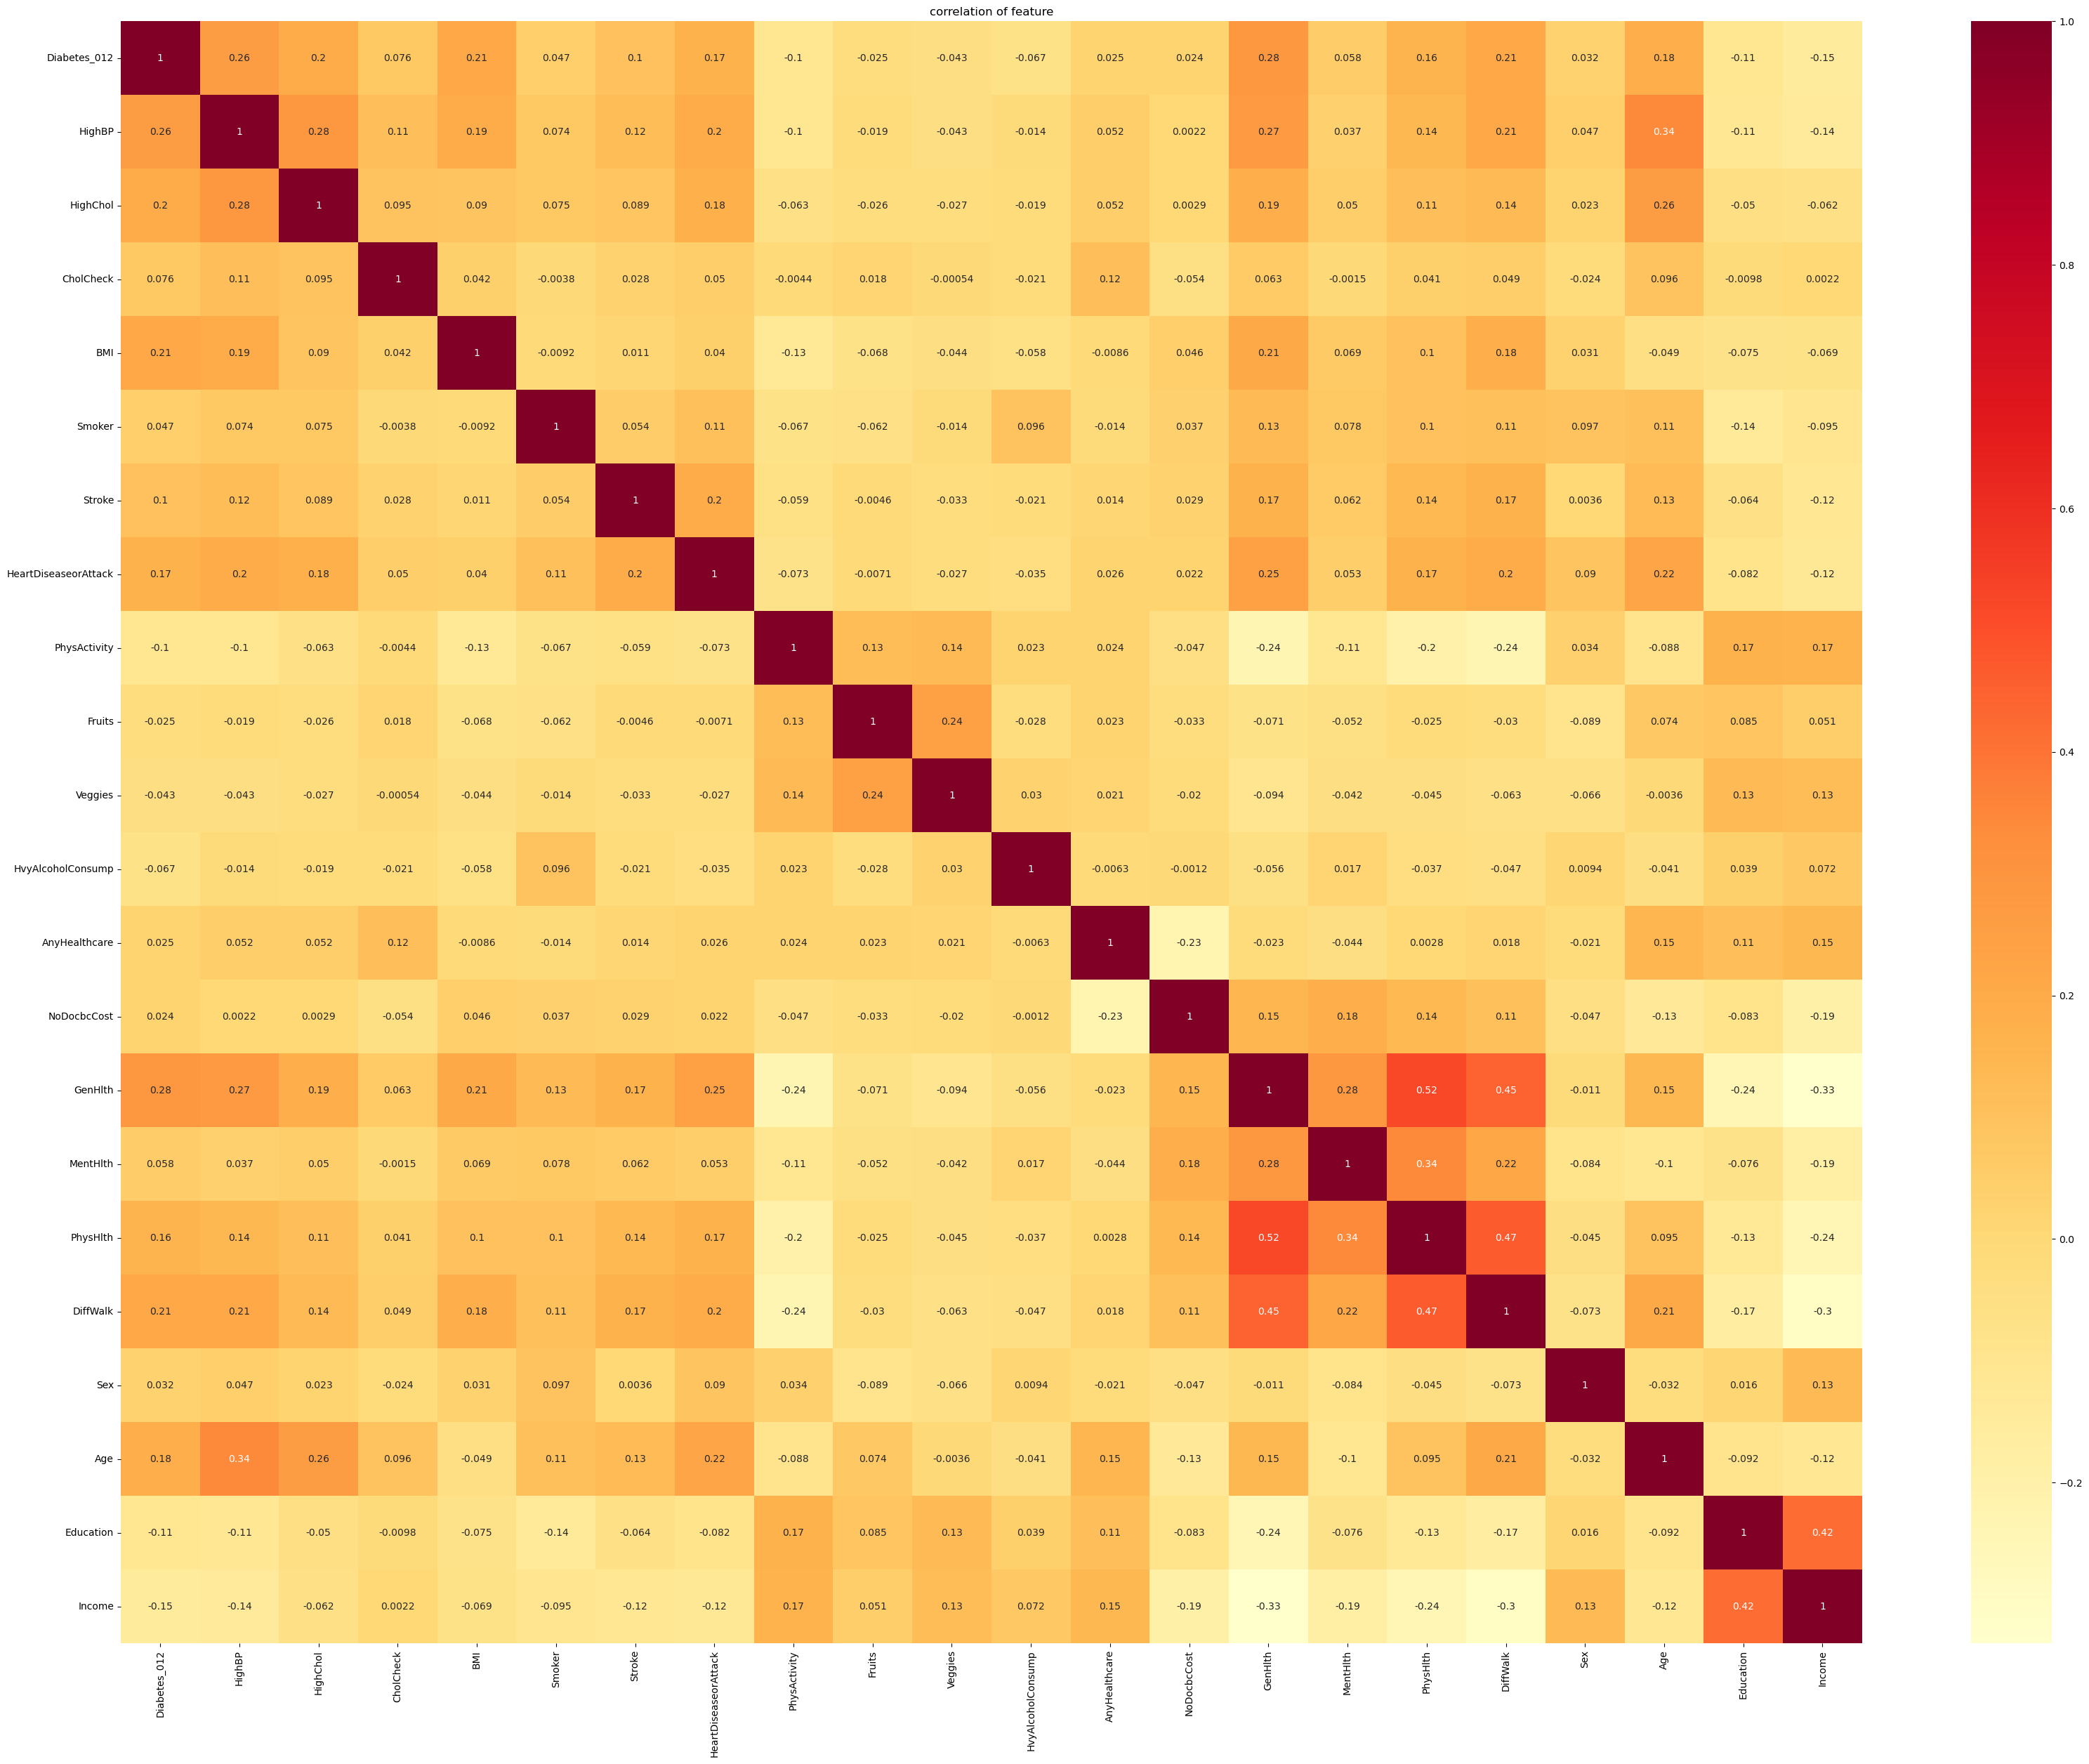

In [ ]:
#using heatmap to understand correlation better in dataset data
#Heatmap of correlation


plt.figure(figsize = (40,30))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

#Correlated positive (GenHlth,PhysHlth),(PhysHlth, DiffWalk),(GenHlth,DiffWalk)
#Correlated negative (GenHlth ,Income) , (DiffWalk,Income)

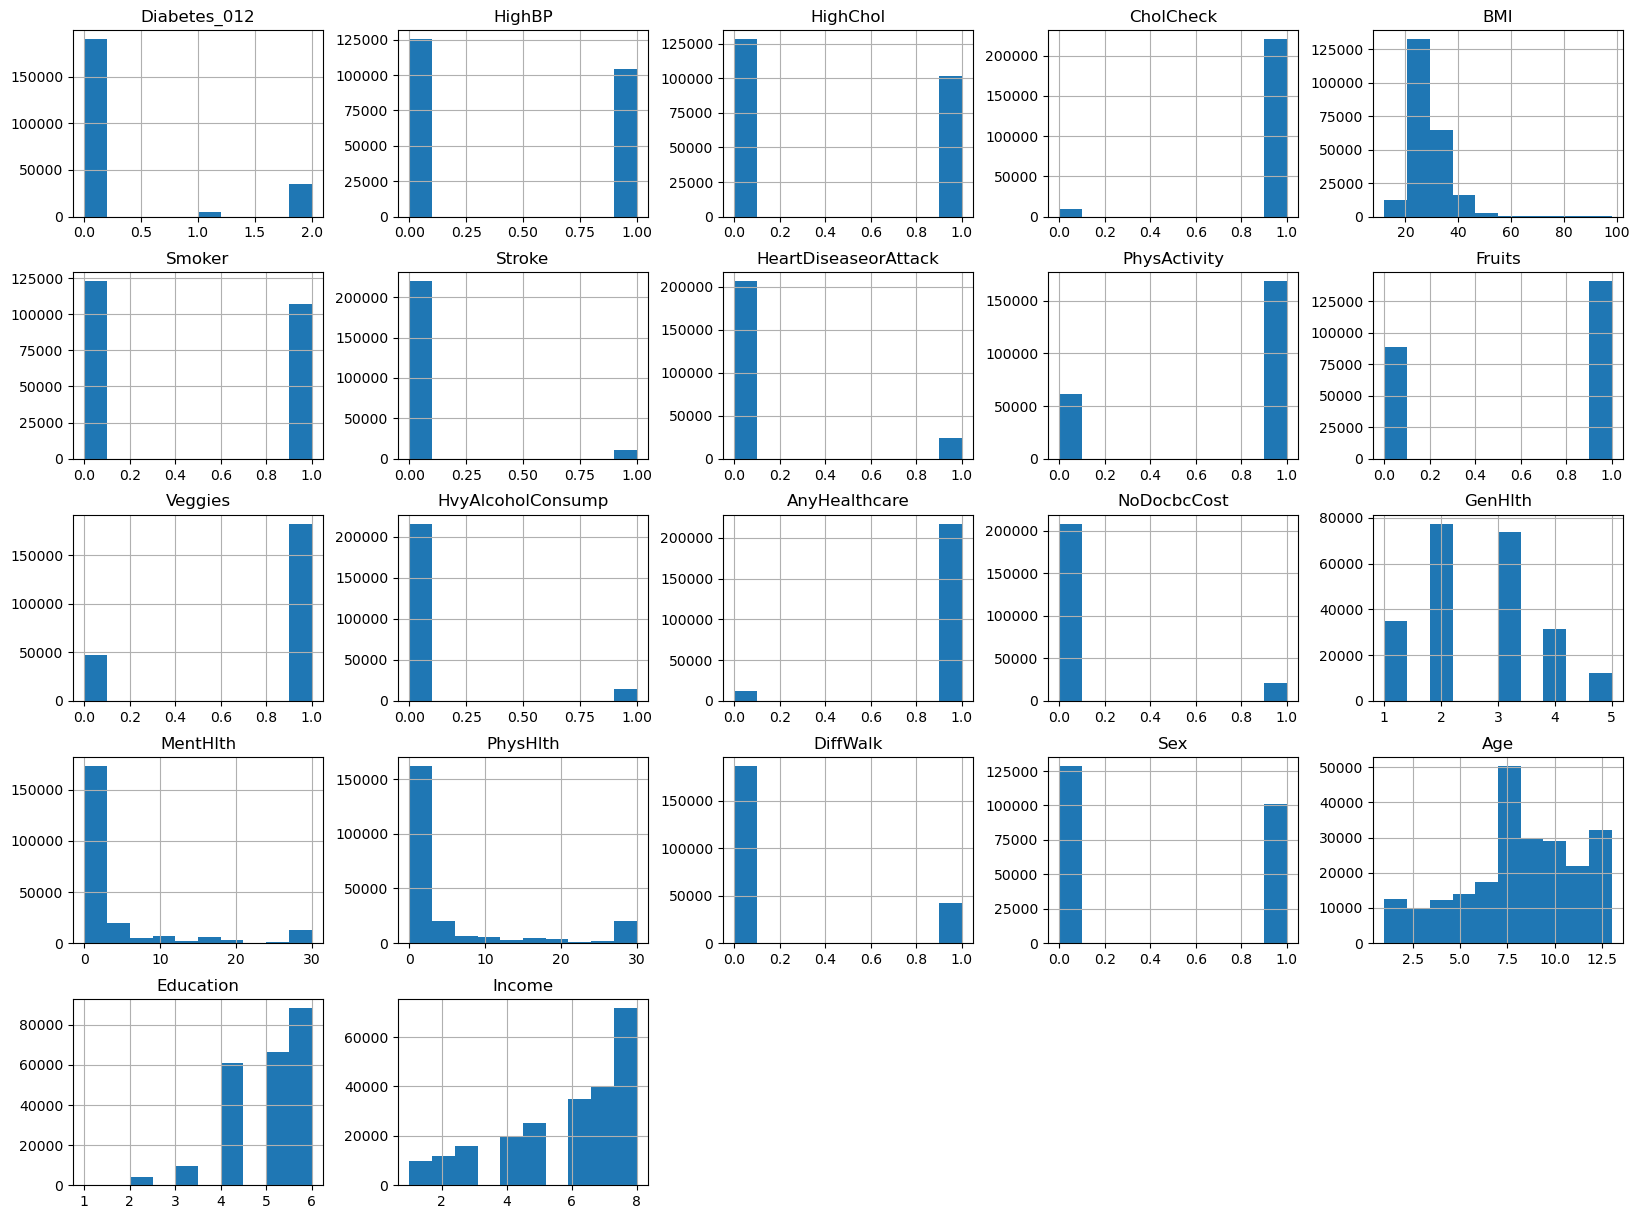

In [ ]:
#using histogram to understand dataset data better
data.hist(figsize=(20,15));

In [ ]:
#Visualization Of [Yes - NO] Columns and their relation with the target
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

In [ ]:
def create_plot_pivot(data2, x_column):
    """ Create a pivot table for satisfaction versus another rating for easy plotting. """
    _df_plot = data2.groupby([x_column, 'Diabetes_012']).size() \
    .reset_index().pivot(columns='Diabetes_012', index=x_column, values=0)
    return _df_plot

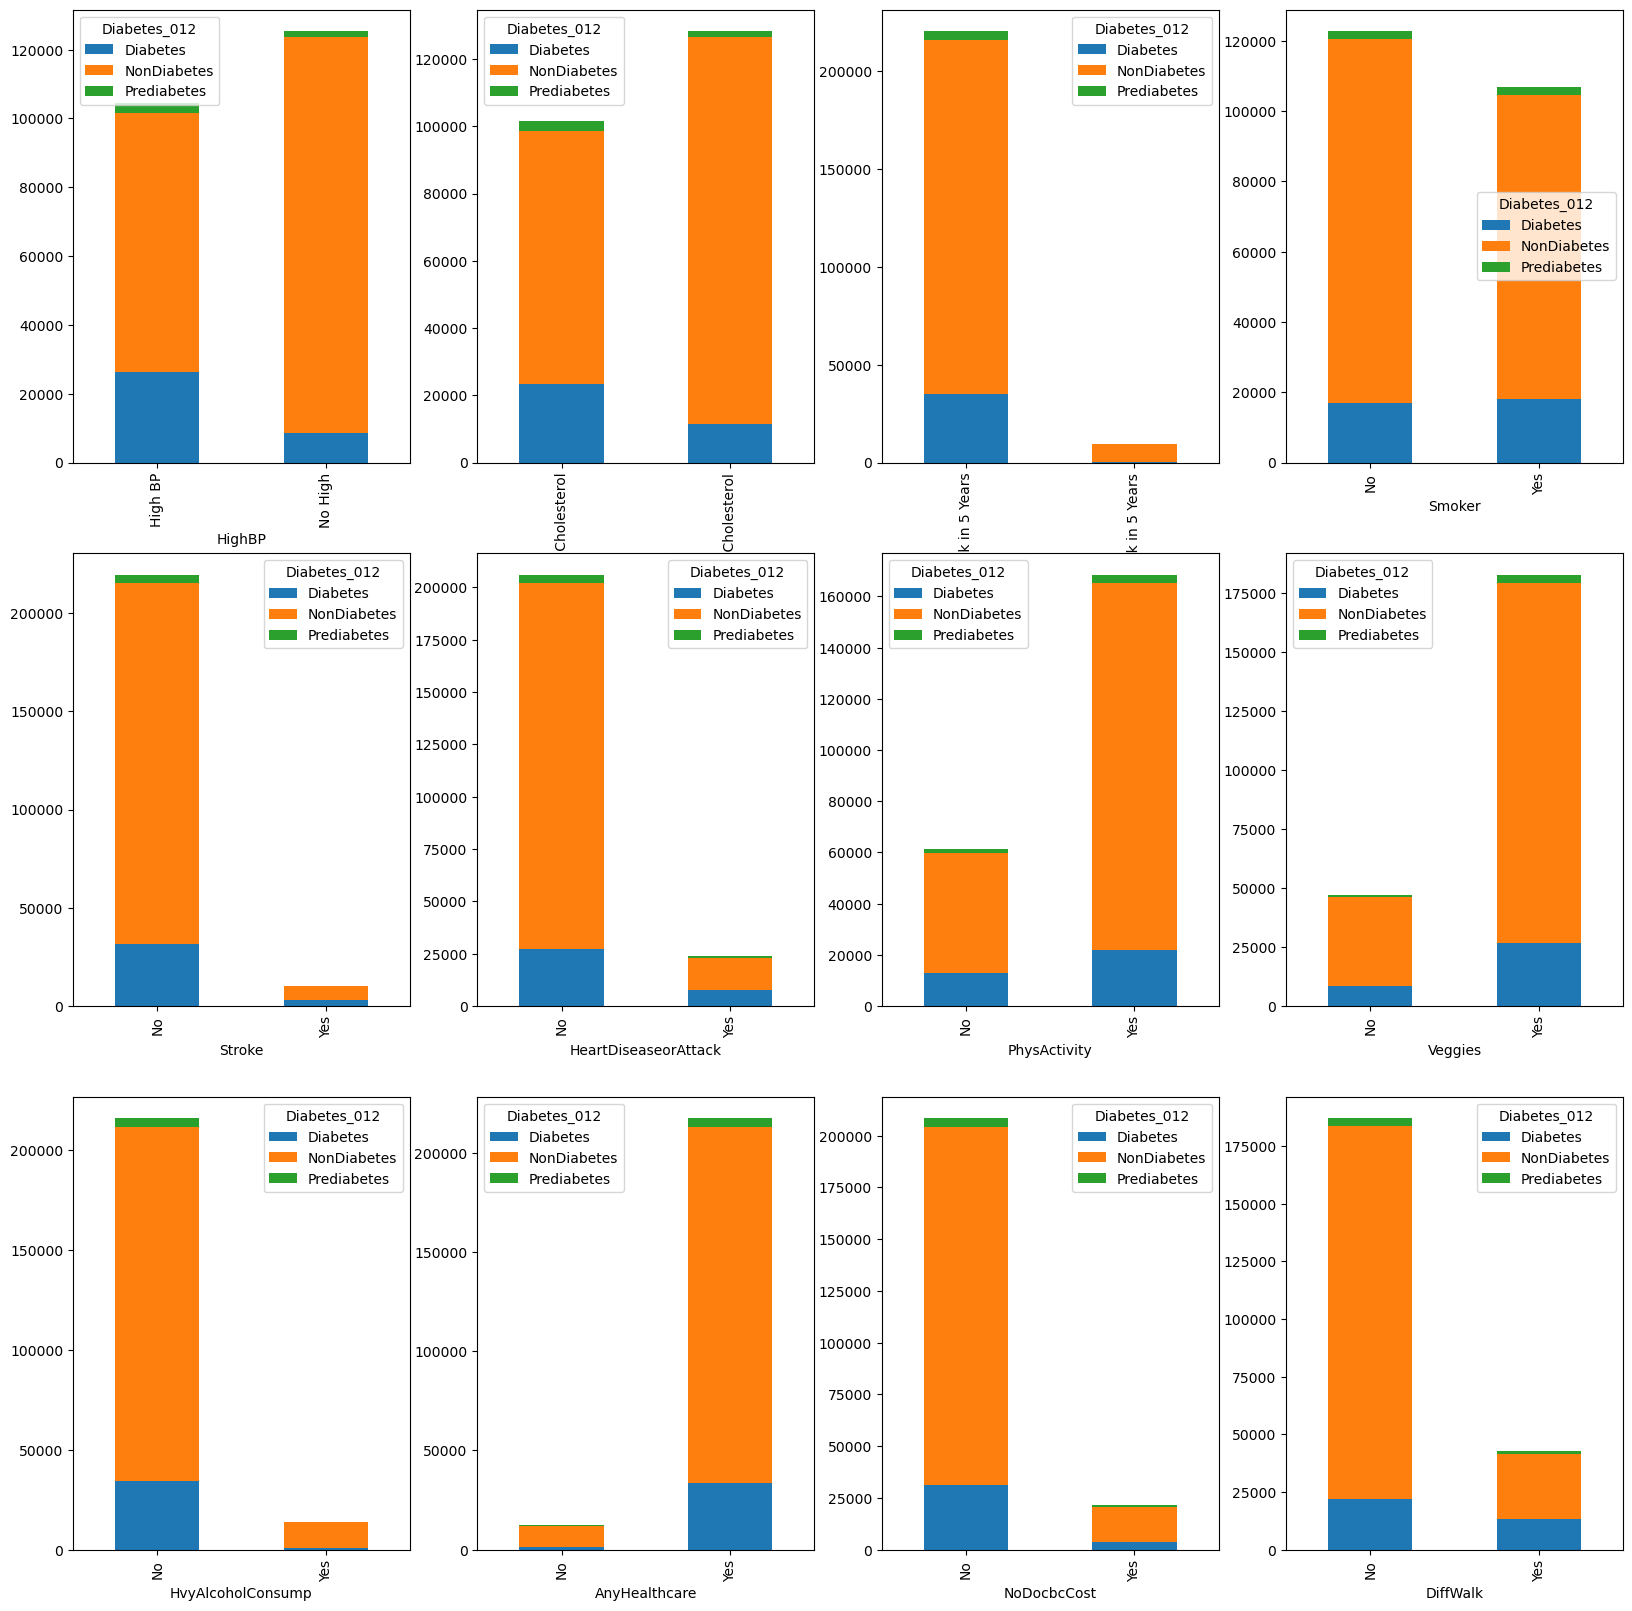

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

fig.show()

In [ ]:
#average of column
data["Diabetes_012"].value_counts()

0    190055
2     35097
1      4629
Name: Diabetes_012, dtype: int64

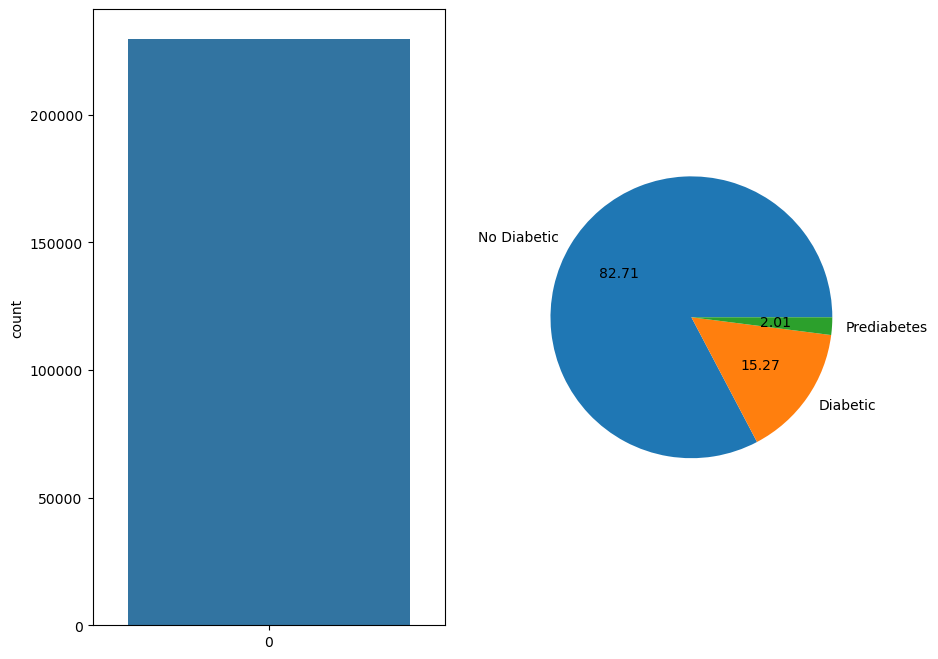

In [ ]:
#checking the value count of Diabetes_binary_str by using countplot
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))
sns.countplot(data['Diabetes_012'],ax=plot1[0])

#checking diabetic and non diabetic pepoles average by pie
labels=["No Diabetic","Diabetic", "Prediabetes"]
plt.pie(data["Diabetes_012"].value_counts() , labels =labels ,autopct='%.02f' );

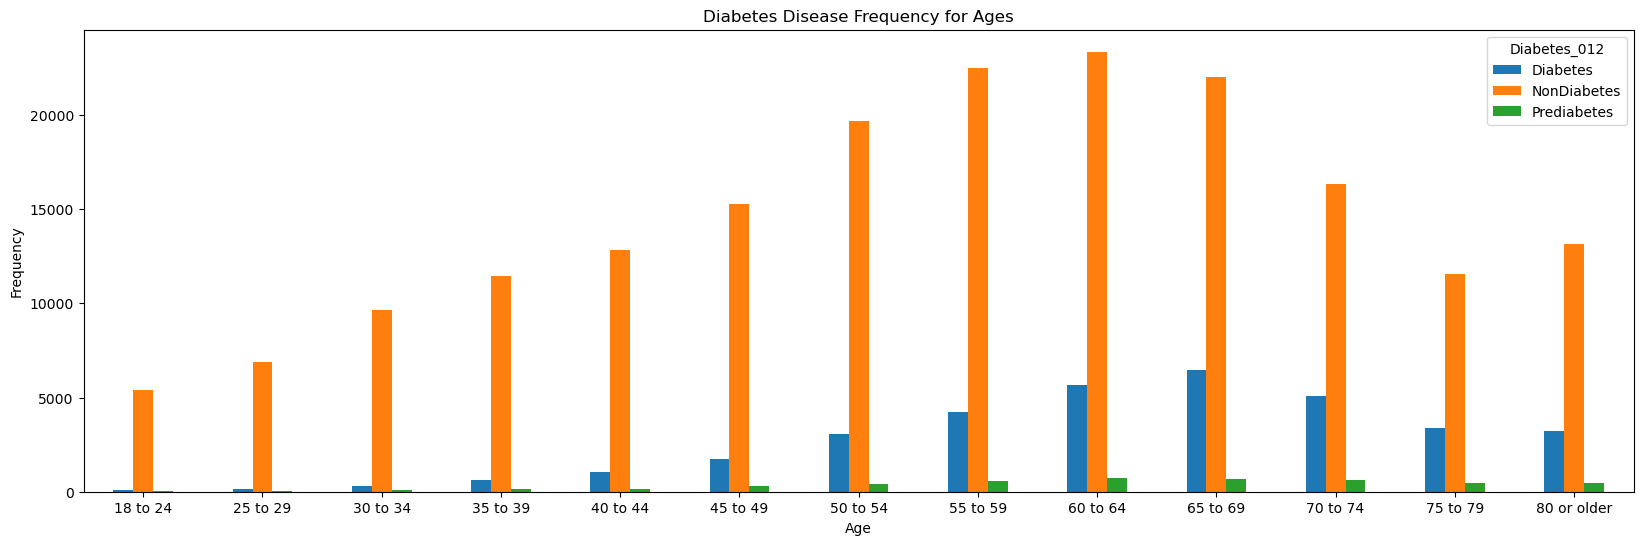

In [ ]:
pd.crosstab(data2.Age,data2.Diabetes_012).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Disease Frequency for Ages')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

KeyboardInterrupt: 

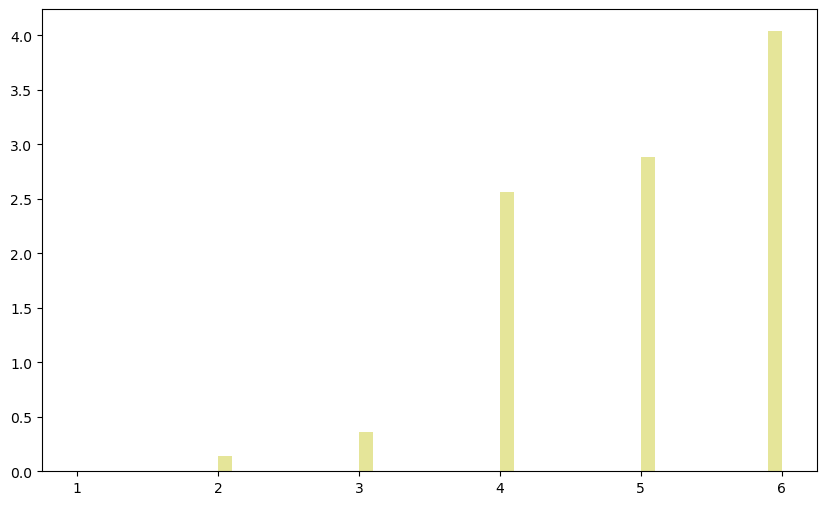

In [ ]:
#The feature "Education" and it's relation with the target
plt.figure(figsize=(10,6))

sns.distplot(data.Education[data.Diabetes_012 == 0], color="y", label="No Diabetic" )
sns.distplot(data.Education[data.Diabetes_012 == 1], color="m", label="Preiabetic" )
sns.distplot(data.Education[data.Diabetes_012 == 2], color="g", label="Diabetic" )
plt.title("Relation b/w Education and Diabetes")

plt.legend()

Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

<Figure size 2000x1000 with 0 Axes>

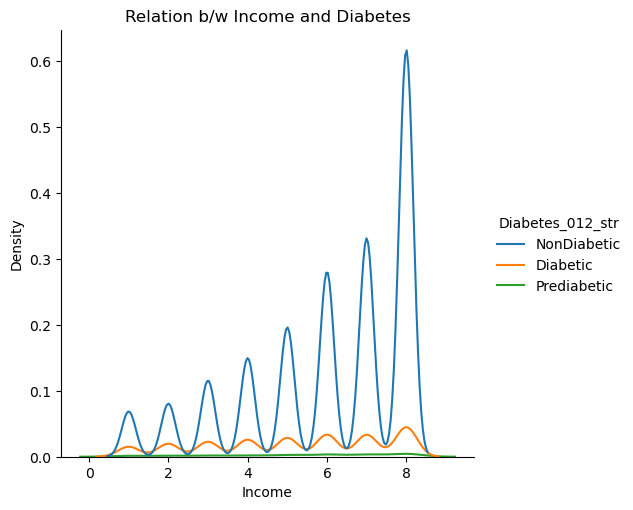

In [ ]:
#income-target
plt.figure(figsize=(20,10))

sns.displot(data=data, x="Income", hue="Diabetes_012_str", kind="kde")
plt.title("Relation b/w Income and Diabetes")

In [ ]:
data.BMI[data.Diabetes_012 == 0]

0         40
1         25
2         28
3         27
4         24
          ..
253673    42
253674    27
253675    45
253677    28
253678    23
Name: BMI, Length: 190055, dtype: int64

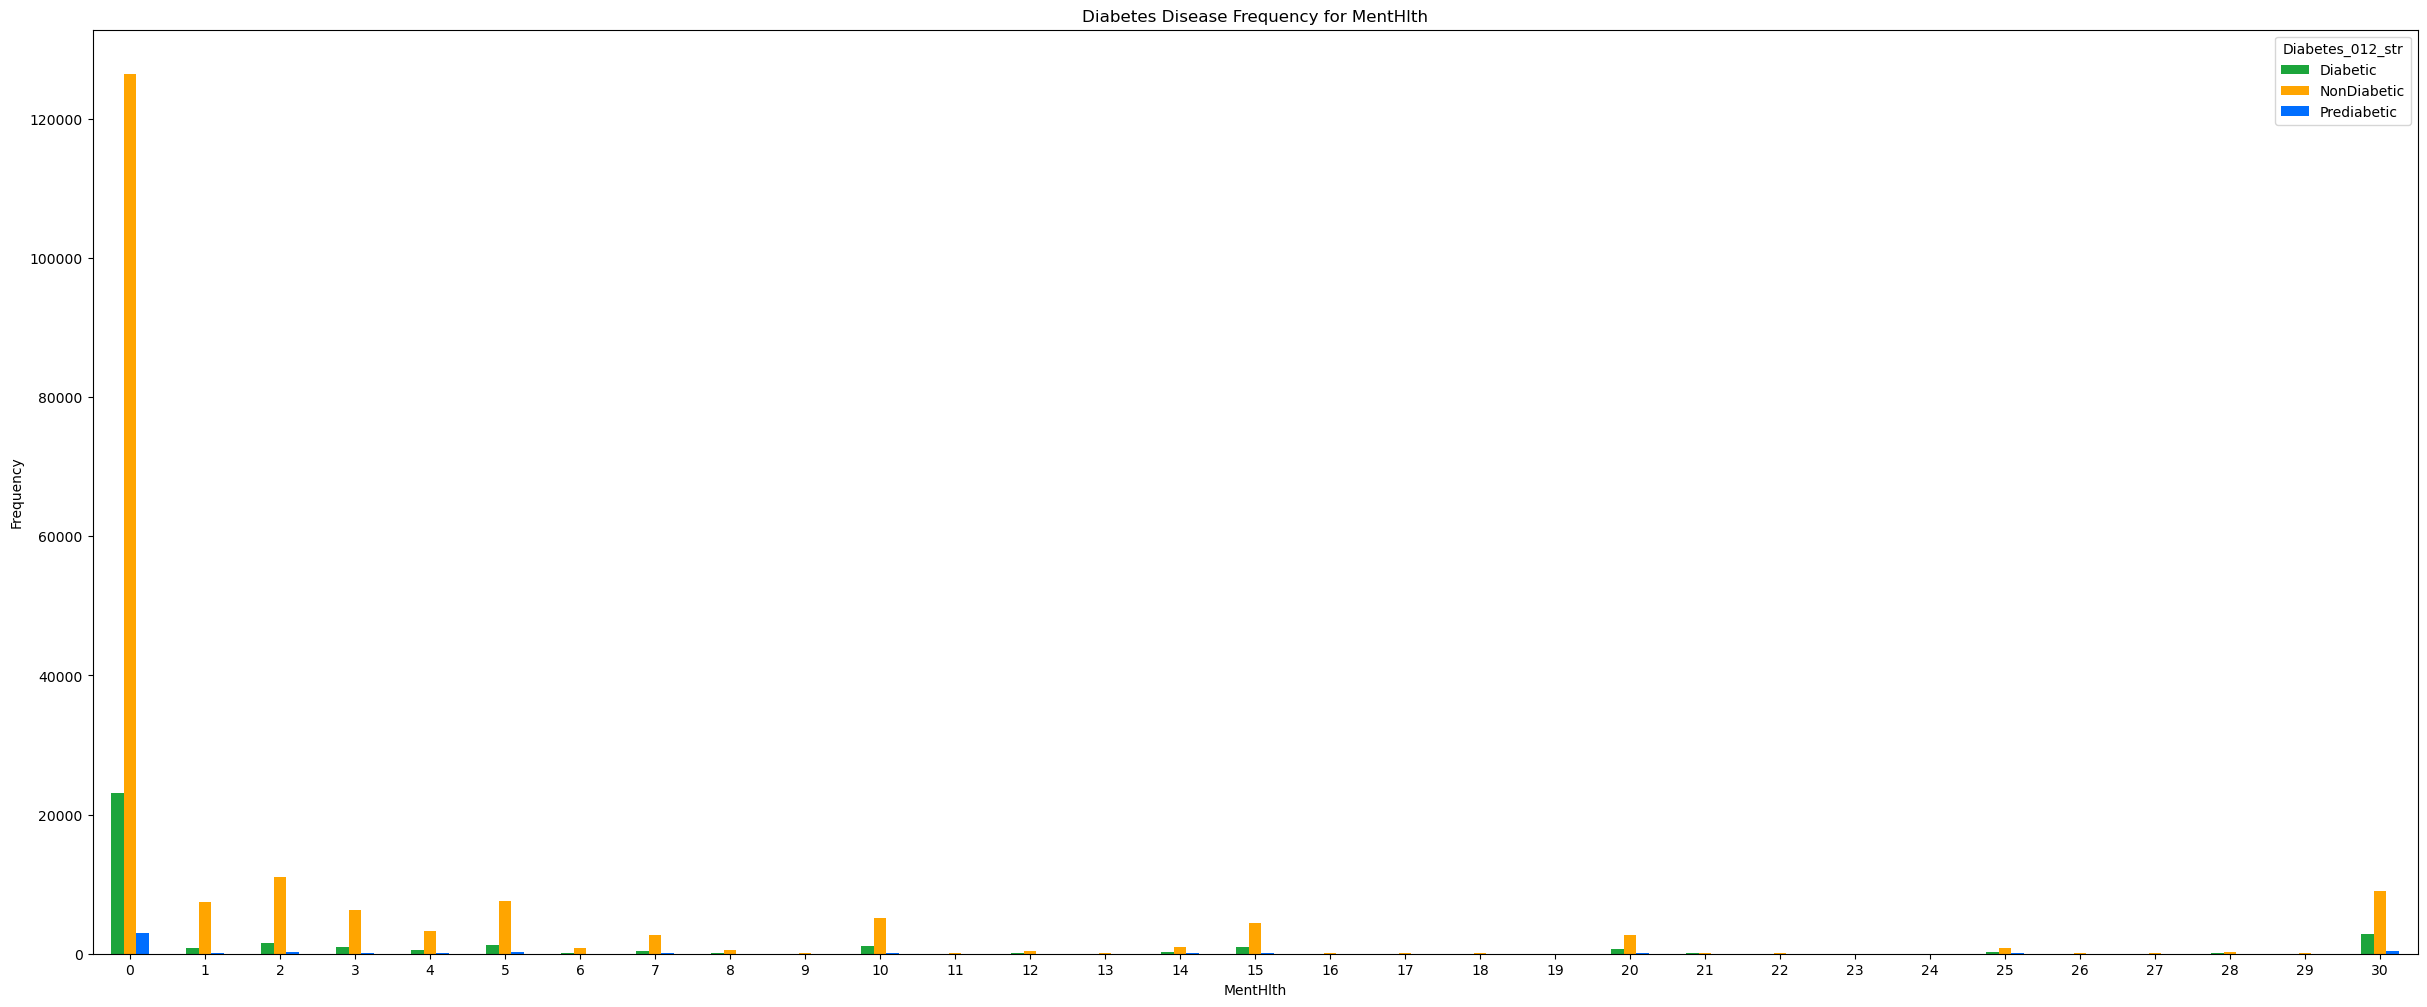

In [ ]:
pd.crosstab(data.MentHlth,data.Diabetes_012_str).plot(kind="bar",figsize=(30,12),color=['#1CA53B', '#FFA500', '#006eff' ])
plt.title('Diabetes Disease Frequency for MentHlth')
plt.xlabel('MentHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

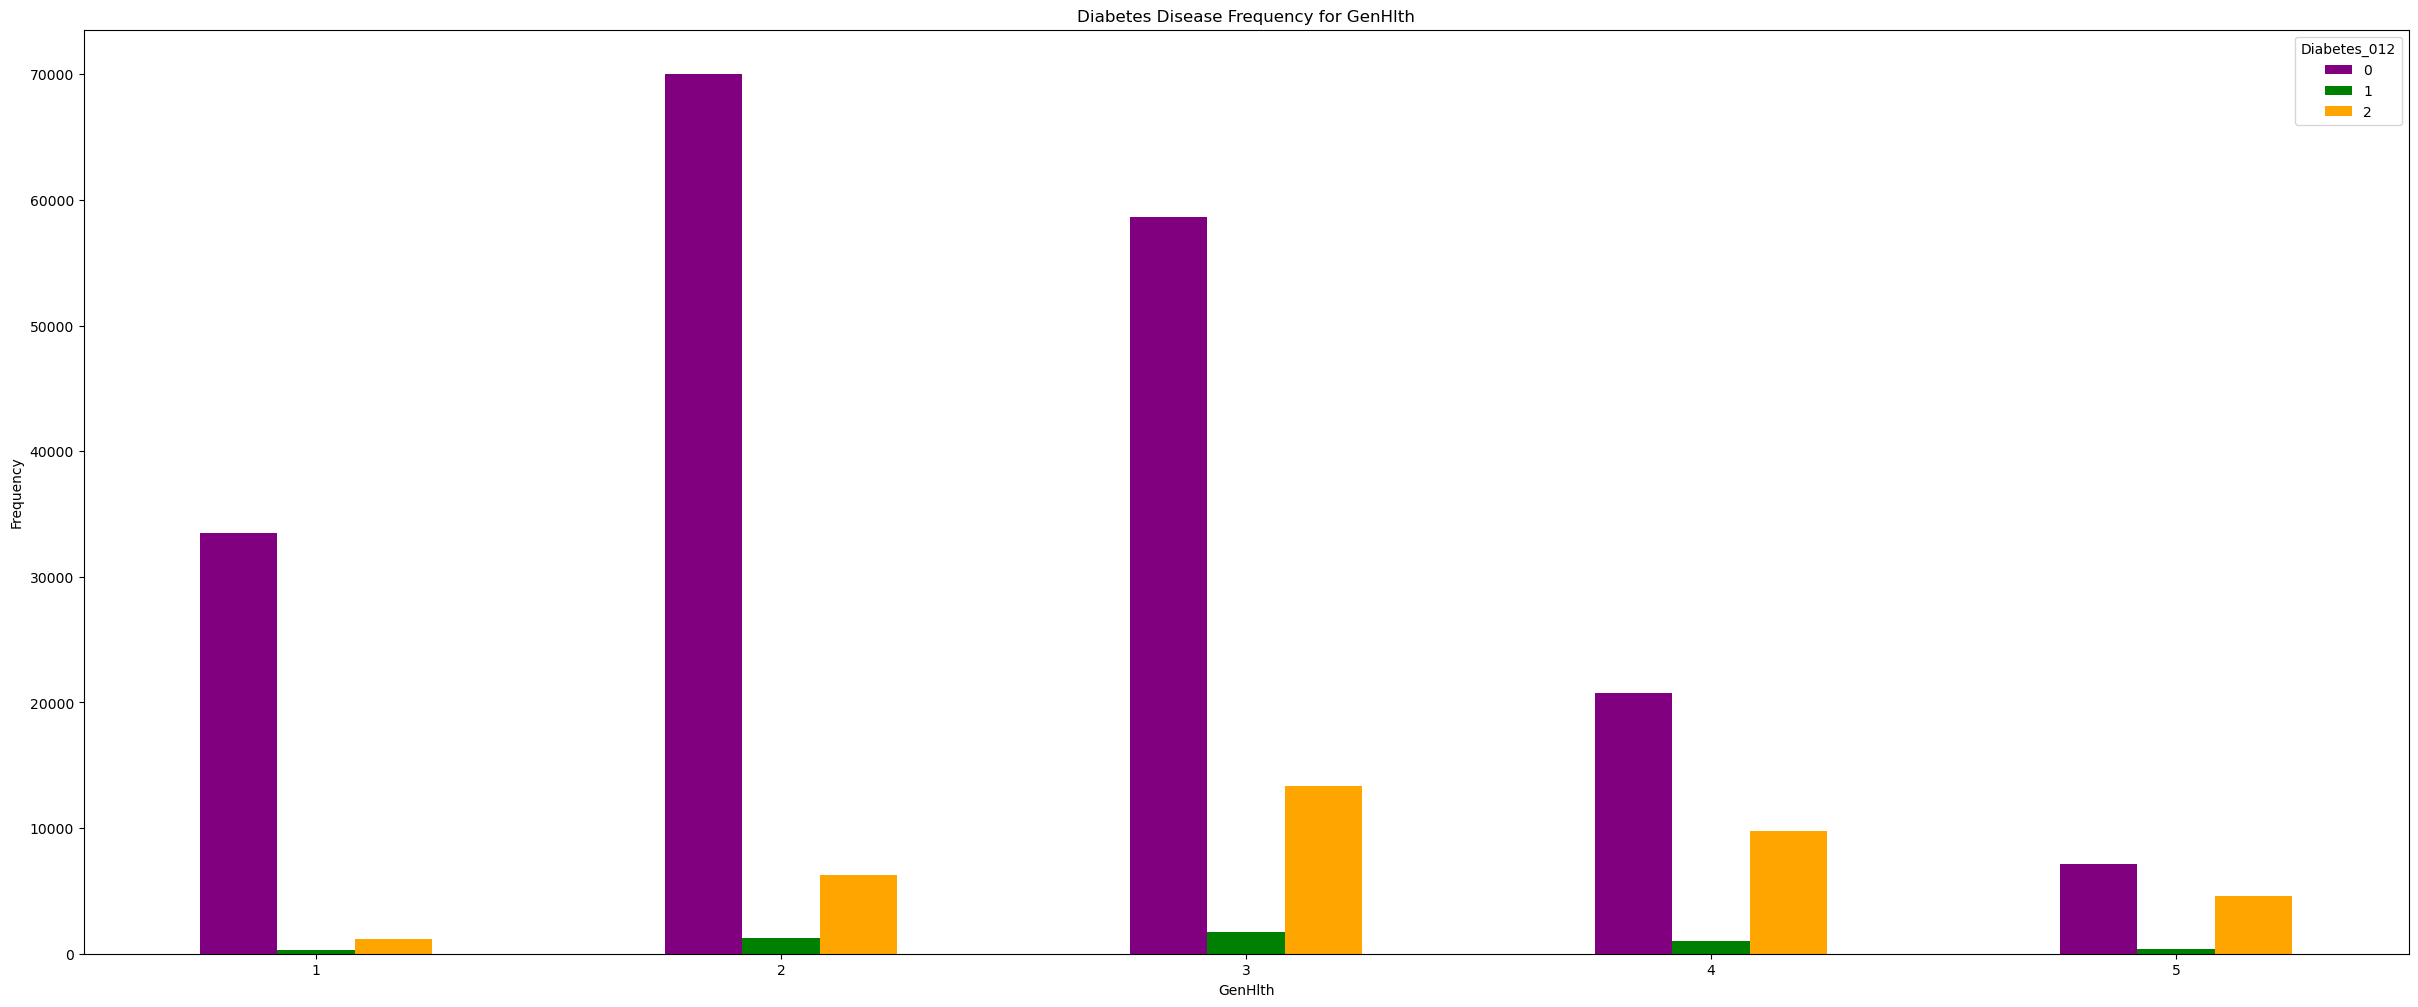

In [ ]:
pd.crosstab(data.GenHlth,data.Diabetes_012).plot(kind="bar",figsize=(30,12),color=['Purple', 'Green', 'Orange' ])
plt.title('Diabetes Disease Frequency for GenHlth')
plt.xlabel('GenHlth')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
#copydata
df = data.copy()

### Get all the features columns except the class
features = list(df.columns)

### Get the features data
df_features = df[features]

In [ ]:
#del df['Diabetes_012_str']

In [ ]:
#scaling values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[df.columns] = scaler.fit_transform(df)
print(df.describe())

ValueError: ignored

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

# >> Explained variation per principal component: [0.36198848 0.1920749 ]
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

#Cumulative variance explained by 2 principal components: 23.87%
#Cumulative variance explained by 3 principal components: 30.06%

In [ ]:
 # Results from pca.components_
df_pca = pd.DataFrame(abs(pca_2.components_), columns=df.columns, index=['PC_1', 'PC_2'])
print('\n\n', df_pca)

In [ ]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (df_pca[df_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (df_pca[df_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")

In [ ]:
from sklearn import metrics
from sklearn.model_selection import ParameterGrid


# candidate values for our number of cluster
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(df)          # fit model on dataset
    ss = metrics.silhouette_score(df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [ ]:
#number of clusters
def q1(df):
    df1 = df[['q4', 'q5', 'q6']]
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
    silhouette_avg = []

    for num_clusters in range_n_clusters:
        #use KMeans for clustering
        kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state = 42)
        kmeans.fit(df1)
        labels = kmeans.labels_

        #silhouette score
        silhouette_avg.append(silhouette_score(df1, labels))

    #define what is best k
    best_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]

    #return the best choice from the function
    return best_k

# Assuming that 'df' is your DataFrame containing the data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# Call the function to perform silhouette analysis
best_k_value = q1(df)
print("The best choice of k is:", best_k_value)

### K-Nearest Neighbors

# Random *Forest*

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [ ]:
#copydata
df = data.copy()
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012_str
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,NonDiabetic
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,NonDiabetic
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,NonDiabetic
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,NonDiabetic
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,NonDiabetic


In [ ]:
X = df.drop(columns=['Diabetes_012','Diabetes_012_str'])
y = df['Diabetes_012']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts()

0    151939
2     28162
1      3723
Name: Diabetes_012, dtype: int64

In [ ]:
OverS=RandomOverSampler(random_state=42, sampling_strategy='not majority')
X_over_train,y_over_train=OverS.fit_resample(X_train,y_train)

UnderS=RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_under,y_under=UnderS.fit_resample(X_train,y_train)

In [ ]:
y_over_train.value_counts()

0    151939
2    151939
1    151939
Name: Diabetes_012, dtype: int64

In [ ]:
y_under_train.value_counts()

2    3718
1    3696
0    3695
Name: Diabetes_012, dtype: int64

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

RF_grid_search_ = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1,verbose=3)
RF_grid_search_.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 2/3] END .....max_depth=5, n_estimators=100;, score=0.829 total time=  15.6s
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=0.829 total time=  15.7s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=0.828 total time=  15.8s
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=0.829 total time=  33.0s
[CV 1/3] END .....max_depth=5, n_estimators=200;, score=0.829 total time=  33.2s
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.828 total time=  33.2s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.833 total time=  27.2s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.835 total time=  27.3s
[CV 2/3] END .....max_depth=5, n_estimators=300;, score=0.829 total time=  47.2s
[CV 1/3] END .....max_depth=5, n_estimators=300;, score=0.829 total time=  47.5s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.834 total time=  23.7s
[CV 3/3] END .....max_depth=5, n_estimators=300;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [ ]:
RF_grid_search_.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [ ]:
y_pred = RF_grid_search_.best_estimator_.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print(f'CV Random Forest Test Accuracy: {rf_acc:.4f}')

CV Random Forest Test Accuracy: 0.8367


In [ ]:
accuracies = {}
accuracy_1 = accuracy_score(y_test, y_pred)
accuracies['Random Forest Classifier'] = accuracy_1

# calculating the classification report
classificationreport = classification_report(y_test, y_pred)


print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)


Accuracy score of Random Forest Classifier : 83.67

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     38116
           1       0.00      0.00      0.00       906
           2       0.57      0.15      0.23      6935

    accuracy                           0.84     45957
   macro avg       0.47      0.38      0.38     45957
weighted avg       0.79      0.84      0.79     45957



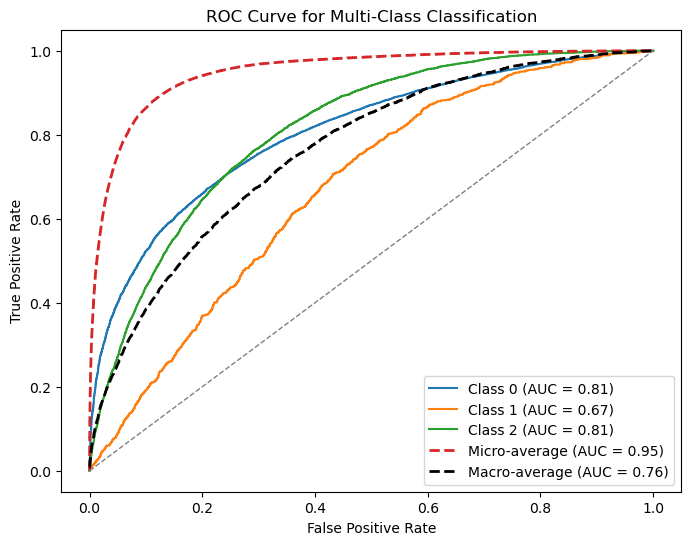

In [ ]:

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = RF_grid_search_.best_estimator_.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3

macro_auc = auc(all_fpr, mean_tpr)

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)


plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {macro_auc:.2f})', linestyle='--', linewidth=2, color='black')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()

## Oversampling

In [ ]:
rfc = RandomForestClassifier(random_state = 42)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

over_RF_grid_search_ = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1,verbose=3)
over_RF_grid_search_.fit(X_over_train,y_over_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=0.508 total time=  43.0s
[CV 2/3] END .....max_depth=5, n_estimators=100;, score=0.511 total time=  43.4s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=0.506 total time=  43.8s
[CV 1/3] END .....max_depth=5, n_estimators=200;, score=0.508 total time= 1.6min
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=0.509 total time= 1.6min
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.506 total time= 1.6min
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.618 total time= 1.5min
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.624 total time= 1.5min
[CV 1/3] END .....max_depth=5, n_estimators=300;, score=0.509 total time= 2.4min
[CV 2/3] END .....max_depth=5, n_estimators=300;, score=0.510 total time= 2.5min
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.619 total time= 1.3min
[CV 3/3] END .....max_depth=5, n_estimators=300;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [ ]:
over_RF_grid_search_.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [ ]:
over_RF_grid_search_.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=300, random_state=42)

In [ ]:
y_over_pred = over_RF_grid_search_.predict(X_test)

rf_acc = accuracy_score(y_test, y_over_pred)
print(f'CV Random Forest Test Accuracy: {rf_acc:.4f}')

CV Random Forest Test Accuracy: 0.7158


In [ ]:
accuracies = {}
accuracy_1 = accuracy_score(y_test, y_over_pred)
accuracies['Random Forest Classifier'] = accuracy_1

classificationreport = classification_report(y_test, y_over_pred)


print('\nAccuracy score of Random Forest Classifier (Oversampling): ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)


Accuracy score of Random Forest Classifier (Oversampling): 71.58

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     38116
           1       0.03      0.07      0.04       906
           2       0.35      0.66      0.46      6935

    accuracy                           0.72     45957
   macro avg       0.43      0.49      0.44     45957
weighted avg       0.82      0.72      0.75     45957



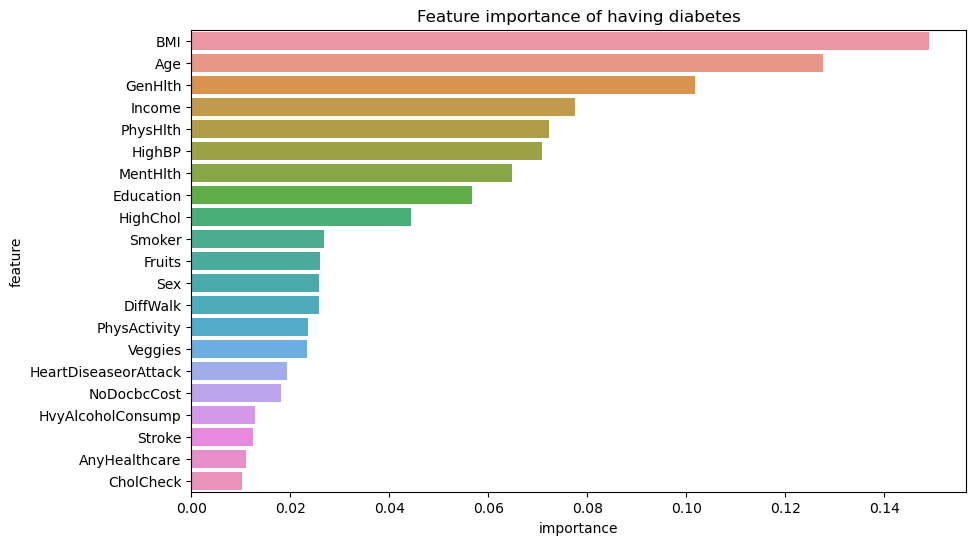

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': over_RF_grid_search_.best_estimator_.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having diabetes')
plt.show()

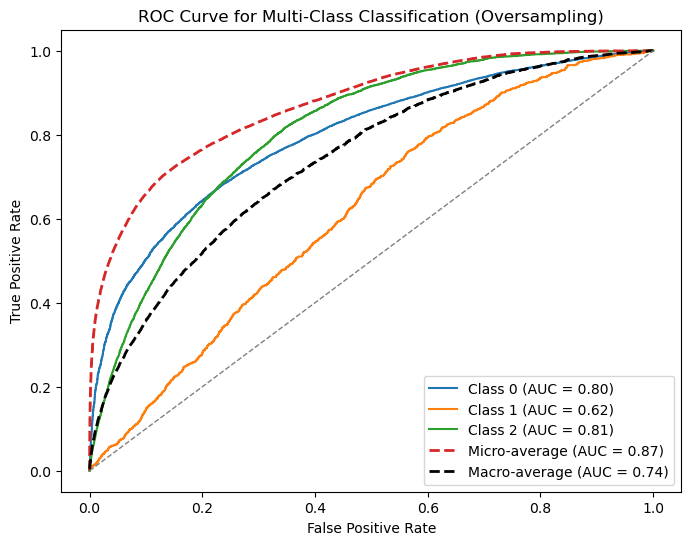

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = over_RF_grid_search_.best_estimator_.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3

macro_auc = auc(all_fpr, mean_tpr)


plt.figure(figsize=(8, 6))


for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')


plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)


plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {macro_auc:.2f})', linestyle='--', linewidth=2, color='black')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Oversampling)')
plt.legend(loc='lower right')
plt.show()

## Undersampling

In [ ]:
rfc = RandomForestClassifier(random_state = 42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

under_RF_grid_search_ = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1,verbose=3)
under_RF_grid_search_.fit(X_under_train,y_under_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END .....max_depth=5, n_estimators=100;, score=0.501 total time=   0.9s
[CV 3/3] END .....max_depth=5, n_estimators=100;, score=0.509 total time=   0.9s
[CV 2/3] END .....max_depth=5, n_estimators=100;, score=0.500 total time=   1.0s
[CV 1/3] END .....max_depth=5, n_estimators=200;, score=0.502 total time=   1.8s
[CV 2/3] END .....max_depth=5, n_estimators=200;, score=0.501 total time=   1.8s
[CV 3/3] END .....max_depth=5, n_estimators=200;, score=0.512 total time=   1.8s
[CV 2/3] END ....max_depth=10, n_estimators=100;, score=0.503 total time=   1.3s
[CV 1/3] END ....max_depth=10, n_estimators=100;, score=0.506 total time=   1.3s
[CV 1/3] END .....max_depth=5, n_estimators=300;, score=0.503 total time=   2.7s
[CV 2/3] END .....max_depth=5, n_estimators=300;, score=0.499 total time=   2.7s
[CV 3/3] END ....max_depth=10, n_estimators=100;, score=0.506 total time=   1.3s
[CV 3/3] END .....max_depth=5, n_estimators=300;,

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [ ]:
under_RF_grid_search_.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [ ]:
under_RF_grid_search_.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [ ]:
y_under_pred = under_RF_grid_search_.predict(X_test)

rf_acc = accuracy_score(y_test, y_under_pred)
print(f'CV Random Forest Test Accuracy: {rf_acc:.4f}')

CV Random Forest Test Accuracy: 0.6257


In [ ]:
accuracies = {}
accuracy_1 = accuracy_score(y_test, y_under_pred)
accuracies['Random Forest Classifier'] = accuracy_1

classificationreport = classification_report(y_test, y_under_pred)

print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)


Accuracy score of Random Forest Classifier : 62.57

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.95      0.63      0.76     38116
           1       0.05      0.51      0.09       906
           2       0.37      0.62      0.46      6935

    accuracy                           0.63     45957
   macro avg       0.46      0.59      0.44     45957
weighted avg       0.84      0.63      0.70     45957



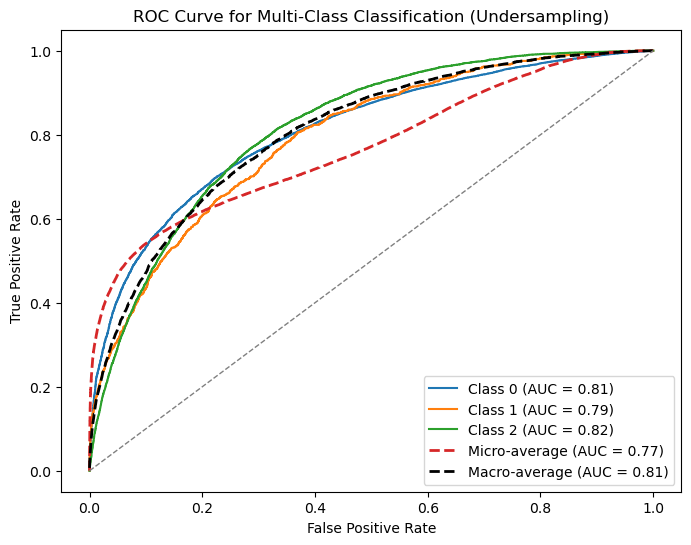

In [ ]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

y_score = under_RF_grid_search_.best_estimator_.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 3

macro_auc = auc(all_fpr, mean_tpr)

plt.figure(figsize=(8, 6))

for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})', linestyle='--', linewidth=2)

plt.plot(all_fpr, mean_tpr, label=f'Macro-average (AUC = {macro_auc:.2f})', linestyle='--', linewidth=2, color='black')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification (Undersampling)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=1.0)

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.8281
Test set score: 0.8305


# Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dct = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dct, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('\nAccuracy score of Random Forest Classifier : ' + str(round(accuracy_1*100, 2)))
print("\n"+"*"*50)
print('\nClassification_report : ')
print(classificationreport)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy score of Random Forest Classifier : 71.58

**************************************************

Classification_report : 
              precision    recall  f1-score   support

           0       0.92      0.74      0.82     38116
           1       0.03      0.07      0.04       906
           2       0.35      0.66      0.46      6935

    accuracy                           0.72     45957
   macro avg       0.43      0.49      0.44     45957
weighted avg       0.82      0.72      0.75     45957



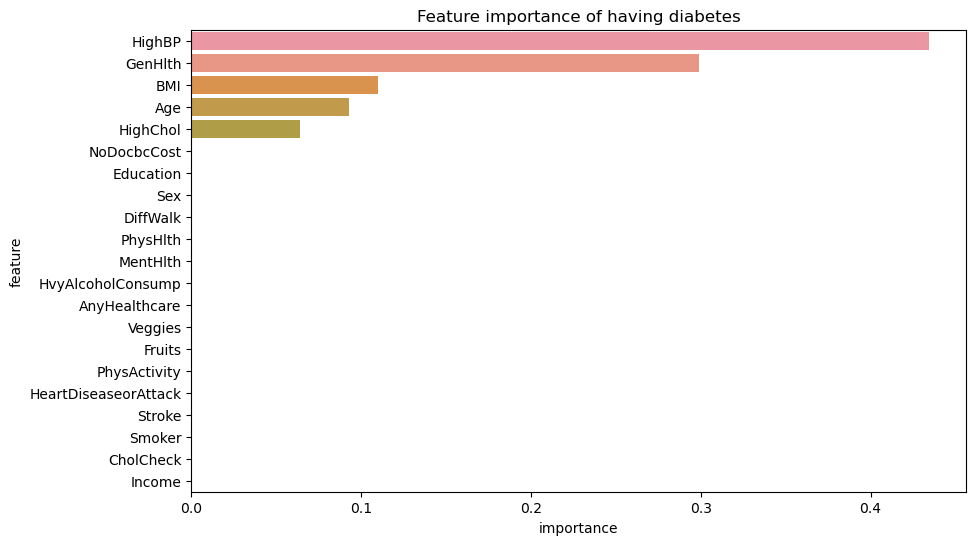

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_model.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having diabetes')
plt.show()